<a href="https://colab.research.google.com/github/aag112/basic01/blob/master/Covid19Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plt
import statsmodels.formula.api as smf
from numpy.random import randn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [80]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949726 entries, 0 to 949725
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    949726 non-null  object 
 1   county  949726 non-null  object 
 2   state   949726 non-null  object 
 3   fips    940870 non-null  float64
 4   cases   949726 non-null  int64  
 5   deaths  929405 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 43.5+ MB


In [82]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [83]:
county = df['county']
county.head(20)

0       Snohomish
1       Snohomish
2       Snohomish
3            Cook
4       Snohomish
5          Orange
6            Cook
7       Snohomish
8        Maricopa
9     Los Angeles
10         Orange
11           Cook
12      Snohomish
13       Maricopa
14    Los Angeles
15         Orange
16           Cook
17      Snohomish
18       Maricopa
19    Los Angeles
Name: county, dtype: object

#Filtering data based off county, state and cases + deaths.

In [84]:
countystate = df.drop(['fips'], axis=1)
countystate

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
949721,2021-01-20,Sweetwater,Wyoming,3347,28.0
949722,2021-01-20,Teton,Wyoming,2788,5.0
949723,2021-01-20,Uinta,Wyoming,1852,10.0
949724,2021-01-20,Washakie,Wyoming,845,24.0


#Specifically, Sweetwater, Wyoming

In [85]:
print("The total deaths to date in Sweetwater, Wyoming are: ")
df[df['county']=='Sweetwater']['deaths'].max()

The total deaths to date in Sweetwater, Wyoming are: 


28.0

In [86]:
print("The total cases to date in Sweetwater, Wyoming are: ")
df[df['county']=='Sweetwater']['cases'].max()

The total cases to date in Sweetwater, Wyoming are: 


3347

#Calculate the daily count of new cases and deaths

In [87]:
print("The most recent death recorded was on:")
recent = df['date'].max()
recent

The most recent death recorded was on:


'2021-01-20'

In [88]:
dailycount = df[df['date']=='2021-01-17']
dailycount.sum()

date      2021-01-172021-01-172021-01-172021-01-172021-0...
county    AutaugaBaldwinBarbourBibbBlountBullockButlerCa...
state     AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...
fips                                            1.01275e+08
cases                                              23983607
deaths                                               397612
dtype: object

In [89]:
dailycount = dailycount.drop(['date', 'county', 'state', 'fips'], axis=1)

In [90]:
print("The daily count of new cases and deaths for " + str(recent) + " were the following:")
dailycount.sum()

The daily count of new cases and deaths for 2021-01-20 were the following:


cases     23983607.0
deaths      397612.0
dtype: float64

#Print the most recent 30 days worth of data for the county

In [91]:
#converting date from object to datetime
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949726 entries, 0 to 949725
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    949726 non-null  datetime64[ns]
 1   county  949726 non-null  object        
 2   state   949726 non-null  object        
 3   fips    940870 non-null  float64       
 4   cases   949726 non-null  int64         
 5   deaths  929405 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 43.5+ MB


counting from last 30 days

In [92]:
df1 = countystate[countystate['date'] > '2020-12-18']
df1

,date,county,state,cases,deaths
842631,2020-12-19,Autauga,Alabama,3698,44.0
842632,2020-12-19,Baldwin,Alabama,11722,147.0
842633,2020-12-19,Barbour,Alabama,1330,32.0
842634,2020-12-19,Bibb,Alabama,1601,42.0
842635,2020-12-19,Blount,Alabama,4191,54.0
...,...,...,...,...,...
949721,2021-01-20,Sweetwater,Wyoming,3347,28.0
949722,2021-01-20,Teton,Wyoming,2788,5.0
949723,2021-01-20,Uinta,Wyoming,1852,10.0
949724,2021-01-20,Washakie,Wyoming,845,24.0


In [93]:
print("The last 30 days of gathered data are as follows:")
thirty = df1.groupby(['date'], as_index=False).sum()
thirty

The last 30 days of gathered data are as follows:


,date,cases,deaths
0,2020-12-19,17701529,316371.0
1,2020-12-20,17881485,317800.0
2,2020-12-21,18083055,319763.0
3,2020-12-22,18284729,323002.0
4,2020-12-23,18512479,326413.0
5,2020-12-24,18706036,329237.0
6,2020-12-25,18807030,330366.0
7,2020-12-26,19023888,332012.0
8,2020-12-27,19175990,333242.0
9,2020-12-28,19365034,335141.0


We need to filter the desired county and state

In [94]:
bool_mask = (df1['state'] == 'Wyoming') & (df1['county'] == 'Sweetwater')
df1_sweet = df1[bool_mask].copy()

We are looking for the last 30 days

In [95]:
print("The last 30 days in Sweetwater, Wyoming are as follows:")
df1_sweet_30 = df1_sweet.loc['2020-12-18':].copy()
df1_sweet_30

The last 30 days in Sweetwater, Wyoming are as follows:


,date,county,state,cases,deaths
845872,2020-12-19,Sweetwater,Wyoming,2702,15.0
849117,2020-12-20,Sweetwater,Wyoming,2718,15.0
852362,2020-12-21,Sweetwater,Wyoming,2762,15.0
855607,2020-12-22,Sweetwater,Wyoming,2780,15.0
858852,2020-12-23,Sweetwater,Wyoming,2820,15.0
862097,2020-12-24,Sweetwater,Wyoming,2820,15.0
865342,2020-12-25,Sweetwater,Wyoming,2820,15.0
868587,2020-12-26,Sweetwater,Wyoming,2845,15.0
871832,2020-12-27,Sweetwater,Wyoming,2854,15.0
875077,2020-12-28,Sweetwater,Wyoming,2921,15.0


#EDA

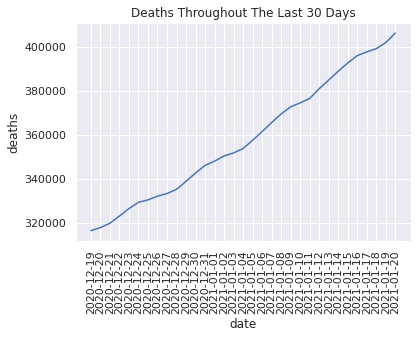

In [96]:
sns.lineplot(data = thirty, x="date", y='deaths',legend='auto')
plt.title('Deaths Throughout The Last 30 Days')
plt.xticks(rotation=90);

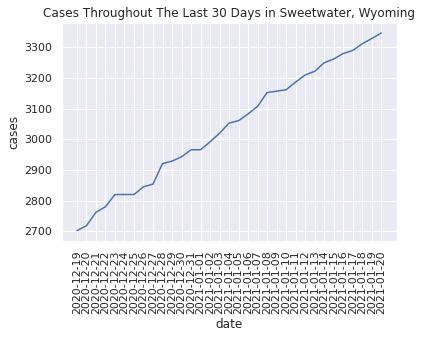

In [97]:
sns.lineplot(x = df1_sweet_30['date'], y = df1_sweet_30['cases'],err_style=None)
plt.title('Cases Throughout The Last 30 Days in Sweetwater, Wyoming')
plt.xticks(rotation=90);

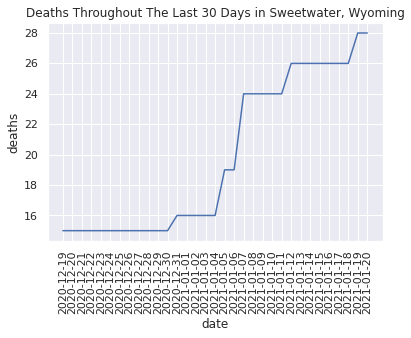

In [98]:
sns.lineplot(x = df1_sweet_30['date'], y = df1_sweet_30['deaths'],err_style=None)
plt.title('Deaths Throughout The Last 30 Days in Sweetwater, Wyoming')
plt.xticks(rotation=90);

creating a list of 4 states of interest

In [99]:
states = ['New York', 'Washington', 'Wyoming', 'California']

filtering for a desired set of states

In [100]:
bool_mask = (df1['state'] == 'New York') | (df1['state'] == 'Washington') | (df1['state'] == 'Wyoming') | (df1['state'] == 'California')
data = df1[bool_mask]

filtering only states from the data assigning it to a new variable

In [101]:
states = countystate.groupby(['state'], as_index=False).sum()
states.head()

,state,cases,deaths
0,Alabama,40244037,636091.0
1,Alaska,3850914,17458.0
2,Arizona,59535175,1253719.0
3,Arkansas,23491953,367192.0
4,California,229777961,3672975.0


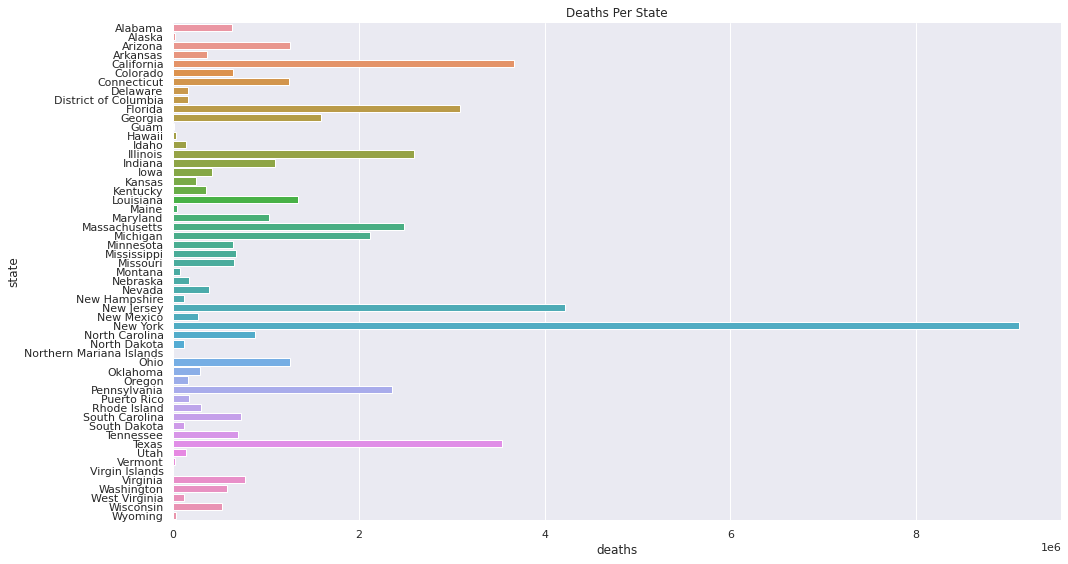

In [102]:
plt.figure(figsize=(15,8))

sns.set(style="darkgrid")

#ax = sns.barplot(x="budget2018", y="ministere", data=budget, label="Total")
sns.set_color_codes("pastel")
sns.barplot(x="deaths", y="state", data=states, label="Deaths Per State")

sns.despine(left=True, bottom=True)
plt.title("Deaths Per State")
plt.tight_layout()
plt.show()

In [103]:
states2 = pd.melt(states, id_vars=['state'], value_vars=['deaths','cases'], var_name='Survived')

In [104]:
states2.head()

,state,Survived,value
0,Alabama,deaths,636091.0
1,Alaska,deaths,17458.0
2,Arizona,deaths,1253719.0
3,Arkansas,deaths,367192.0
4,California,deaths,3672975.0


Comparing cases with deaths in each state

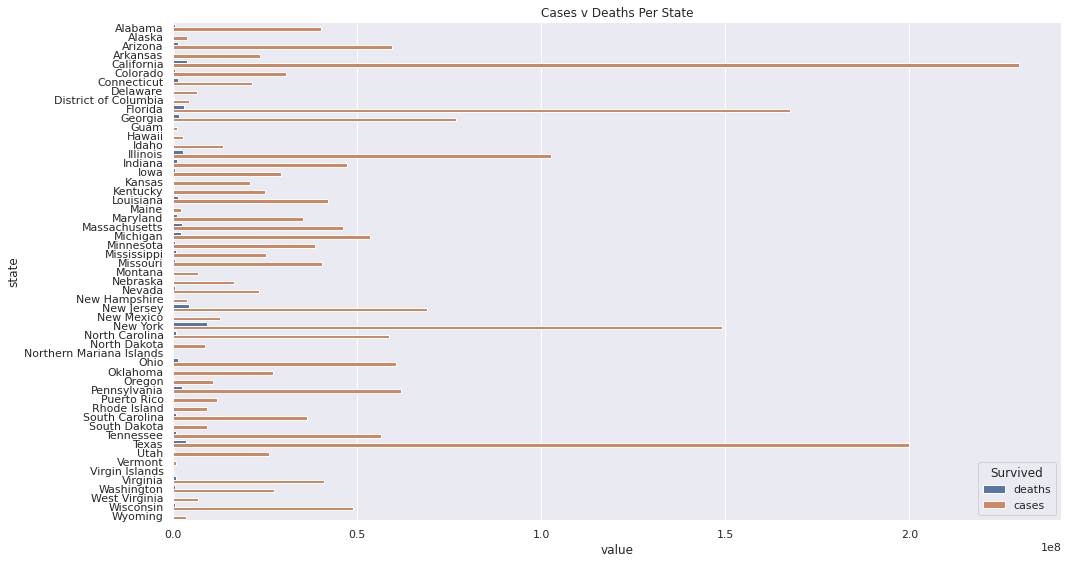

In [105]:
plt.figure(figsize=(15,8))

sns.set(style="darkgrid")


sns.set_color_codes("pastel")
sns.barplot(x="value", y="state", data=states2, hue='Survived')

sns.despine(left=True, bottom=True)
plt.title("Cases v Deaths Per State")
plt.tight_layout()
plt.show()

#Predicting future trends

In [106]:
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [107]:
#create a list containing all the dates and we convert them from string to a more suitable datetime format.
dates = df['date']
date_format = [pd.to_datetime(d) for d in dates]

#Creating derived variable for the model

by using the combined values of cases and deaths as a indication of Covid-19's progression and viewing trends

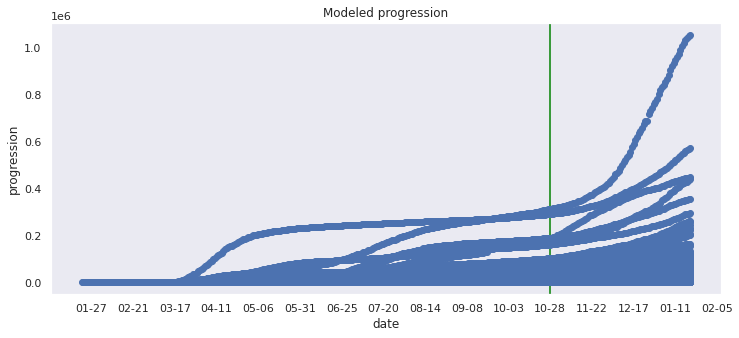

In [108]:
df['progression'] = df['cases'] + df['deaths']
variable = 'progression'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(df['date'],df[variable])
ax.set(xlabel="date",ylabel=variable,title='Modeled ' + variable)
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 25)) #interval between dates shown on graph
ax.axvline(datetime(2020, 10, 28), c="green", zorder=0)
fig.savefig(variable + '.png')
plt.show()

The green line is shown to represent the start of the ascending trend shown by our data.

#Building a Linear Regression model according to our progression variable and our trend indicator (October 28, 2020)

upon receiving a "Input contains NaN, infinity or a value too large for dtype('float64')." error. The data set needed to be cleaned

In [109]:
'''from sklearn import linear_model
df_reset = df
def clean_dataset(df_reset):
    assert isinstance(df_reset, pd.DataFrame), "df_reset needs to be a pd.DataFrame"
    df_reset.dropna(inplace=True)
    indices_to_keep = ~df_reset.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_reset[indices_to_keep].astype(np.float64)
clean_dataset'''

<function __main__.clean_dataset>

In [114]:
df_reset.replace('?', np.nan, inplace=True)
df_reset.dropna(inplace=True)

In [131]:
# prepare the lists for the model
X = date_format
y = df_reset['progression'].tolist()[1:] #convert the index into a list
# date format is not suitable for modeling. Need to transform the date into incrementals number starting from 10/28/20
starting_date = 275  # Oct 28 is the 275th day of the series
day_numbers = []
for i in range(1, len(X)):
    day_numbers.append([i])
X = day_numbers
# train our model only with data after the peak and filter out the previous data
X = X[starting_date:920548] #added 275 to the length of y so that they can be equal dimensions
y = y[starting_date:]


# Instantiate Linear Regression
linear_regr = linear_model.LinearRegression()
# Train the model using the training sets
linear_regr.fit(X, y)
print ("Linear Regression Model Score: %s" % (linear_regr.score(X, y)))


Linear Regression Model Score: 0.026599604681864508


The R^2 value here is too low to for the model to be considered fit to our data. The coefficient of determination should be close to 1

#In conclusion, the data shows that there has been a great recovery rate in every state. New York, New Jersey, California, Florida and Texas seem to lead the country in death count with a considerable amount of cases respectively.